# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

At this project we try to scrap Etherium Price data from Coingecko website. Coingecko CoinGecko is the world’s largest independent cryptocurrency data aggregator with over 6,000 different cryptoassets tracked across more than 400 exchanges worldwide. 

We will try to scrap this sites using BeautifulSoup to get historical data of Market Capitalisation, Volume, Open and Close then  make the visualisation and the analysis for educational purpose as part of Algoritma's training.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [120]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')



To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [121]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [141]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Now we should search the lines that we want to use. Let's back to our web page first.

<img src="asset/eth1.png">

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. After exploring the page by inspect function of browser we found that the right key are `'table'` element and `'class':'table table-striped text-sm text-lg-normal'` attribute.

<img src="asset/eth2.png">


In [123]:
    table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


We do the scrapping process here and finding row length.

As we can see from the line we just extract, we get all the content we needed.
The find() function can help us to get the part of the html code that we needed.

Now, we need to get 5 information, that is Date as the period of time, Market Cap, Volume, Open and Close. Which you can read from above code, Date is contained within table with "class':'font-semibold text-center", the rest in "class':'text-center"

In [124]:
#scraping data of "Date"
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text
row = table.find_all('th', attrs={'class':'font-semibold text-center'})

#fingding row_length of "Date"
row_length = len(row)
row_length


547

In [173]:
#scraping data of marketcap, volume, open and close
table.find_all('td', attrs={'class':'text-center'})[0:5]
stock = table.find_all('td', attrs={'class':'text-center'})

#check stock_length
stock_length = len(stock)
stock_length

2188

We use iteration to walk through and get only the value.
Notice that `Market cap`, `volume`, `open` and `close` are stored combined in one array at every 4 sequence.
That is occur due to they have same key.
So we need modify the iteration process to get the data correctly.

In [138]:
temp = [] #init
for i in range(0, row_length):
    
    #get date 
    date = row[i].text
 
    #get market_cap
    x0 = i * 4
    market_cap = stock[x0].text.strip()
        
    #get volume
    x1 = (i * 4)+1
    volume = stock[x1].text.strip() 
        
    #get open
    x2 = (i * 4)+2
    open_info = stock[x2].text.strip()
    
    #get close
    x3 = (i * 4)+3
    close_info = stock[x3].text.strip()

    temp.append((date,market_cap,volume,open_info,close_info))
temp 


[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

## Creating data frame & Data wrangling

Put the array into dataframe

In [139]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','market_cap','volume','open','close'))
df.head()


,date,market_cap,volume,open,close
0,2021-06-30,"$253,607,549,372","$27,149,143,847","$2,169.40",N/A
1,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"


C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/3620412572.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['market_cap'] = eth['market_cap'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/3620412572.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['volume'] = eth['volume'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/3620412572.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['open'] = eth['open'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Lo

date          datetime64[ns]
market_cap           float64
volume               float64
open                 float64
close                float64
dtype: object

We do the data cleaning here. First we can copy to another variable Dataframe. Next identify what datatypes should have for every columns. In this case 'Date' must be convert to Datetime while the rest is to float. To convert into float we should remove `$` and `,`  and also handle the "N/A" case.

In [145]:
import numpy as np
eth = df.copy()
eth.dtypes

eth['date'] = eth['date'].astype('datetime64')

eth['market_cap'] = eth['market_cap'].str.replace("$","")
eth['market_cap'] = eth['market_cap'].str.replace(",","")
eth['market_cap'] = eth['market_cap'].astype("float64")

eth['volume'] = eth['volume'].str.replace("$","")
eth['volume'] = eth['volume'].str.replace(",","")
eth['volume'] = eth['volume'].astype("float64")

eth['open'] = eth['open'].str.replace("$","")
eth['open'] = eth['open'].str.replace(",","")
eth['open'] = eth['open'].astype("float64")

eth['close'] = eth['close'].str.replace("$","")
eth['close'] = eth['close'].str.replace(",","")
eth['close']= eth['close'].replace('N/A',np.NaN) # to handle "N/A" by change as missing value
eth['close'] = eth['close'].astype("float64")


#checking missing value
eth.info()
# there is only one missing value that in Close


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        547 non-null    datetime64[ns]
 1   market_cap  547 non-null    float64       
 2   volume      547 non-null    float64       
 3   open        547 non-null    float64       
 4   close       546 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 21.5 KB


C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/1340002157.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['market_cap'] = eth['market_cap'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/1340002157.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['volume'] = eth['volume'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Local\Temp/ipykernel_8520/1340002157.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  eth['open'] = eth['open'].str.replace("$","")
C:\Users\SHANDY~1\AppData\Lo

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use set_index()

In [146]:
eth = eth.set_index('date')
eth

,market_cap,volume,open,close
date,,,,
2021-06-30,2.536075e+11,2.714914e+10,2169.40,NaN
2021-06-29,2.430405e+11,3.062933e+10,2087.52,2169.40
2021-06-28,2.293540e+11,2.431641e+10,1973.93,2087.52
2021-06-27,2.099893e+11,2.424951e+10,1817.05,1973.93
2021-06-26,2.138718e+11,2.598138e+10,1833.46,1817.05
...,...,...,...,...
2020-01-05,1.463621e+10,6.958394e+09,134.14,135.01
2020-01-04,1.461319e+10,9.655245e+09,133.70,134.14
2020-01-03,1.385979e+10,6.497298e+09,127.05,133.70


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

We do our simple visualisation to analize the data.

<AxesSubplot:xlabel='date'>

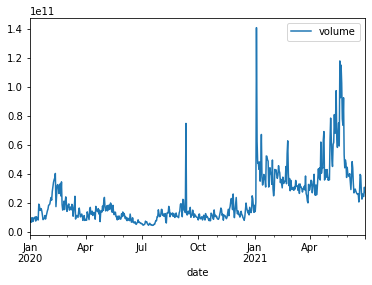

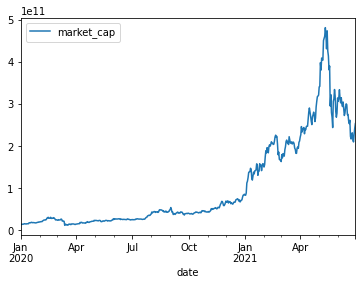

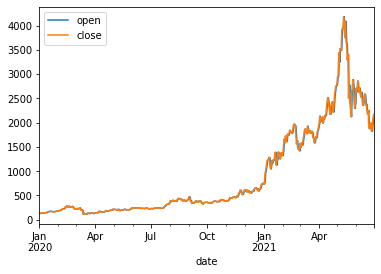

In [170]:
eth[['volume']].plot()

#additional
eth[['market_cap']].plot()
eth[['open','close']].plot()




(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

ETH analysis as the following :
- ETH volume transaction was in uptrend from Jan21 to May21 and then declined until Jun21. The highest spike was at Jan21 in amount USD 140Bn.

- In market cap wise, ETH trend significantly rose from Jan21 to May21 reached USD 481.4 Bn as the highest and declined to USD 253 Bn  at end of Jun21.

- The price trendline shows very similar to market cap. We can conclude the price is very affected by the market cap. The highest price was USD 4,182 and declined to 2,169 at end of Jun21

In [172]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format


#eth['market_cap'].describe()

#highest volume
eth.sort_values("volume", ascending=False)

#ADDITIONAL
#highest market cap
eth.sort_values("market_cap", ascending=False)

#latest market cap
eth.sort_values("date", ascending=False)

#highest price
eth.sort_values("close", ascending=False)

#latest price
eth.sort_values("date", ascending=False)


,market_cap,volume,open,close
date,,,,
2021-06-30,"253,607,549,372.0","27,149,143,847.0","2,169.4",NaN
2021-06-29,"243,040,539,437.0","30,629,329,806.0","2,087.52","2,169.4"
2021-06-28,"229,354,016,311.0","24,316,408,028.0","1,973.93","2,087.52"
2021-06-27,"209,989,265,221.0","24,249,510,321.0","1,817.05","1,973.93"
2021-06-26,"213,871,849,532.0","25,981,381,067.0","1,833.46","1,817.05"
...,...,...,...,...
2020-01-05,"14,636,213,160.0","6,958,393,690.0",134.14,135.01
2020-01-04,"14,613,194,776.0","9,655,245,100.0",133.7,134.14
2020-01-03,"13,859,793,330.0","6,497,297,884.0",127.05,133.7
